In [ ]:
import numpy as np
import pandas as pd


In [ ]:
ar = pd.read_csv('dmproj.csv',index_col=0)

In [ ]:
ar.columns

In [ ]:
#check for null values
ar.isnull().sum()

In [ ]:
ar['username'].is_unique

In [ ]:
#main_ar.loc[main_ar['username'] == 'ChoiceMatters'
ar[ar.duplicated(['username'])]


In [ ]:
df2 = ar.drop_duplicates(subset=['username'], keep=False)


In [ ]:
df2.count()


In [ ]:
df2['username'].is_unique

Removed duplicates vales from the dataset 
(Username)

In [25]:
main_ar = df2[['location','text','time']]

In [26]:
main_ar.describe()

,location,text,time
count,1774,2617,2617
unique,1162,837,2608
top,United States,"Ladies in TX, do NOT buy his lies. #AbortionR...",2022-10-15 17:01:32+00:00
freq,63,237,2


In [27]:
#remove UTCOffset from the datetime value on first converting datetime value obj to datetime type
main_ar['time'] = pd.to_datetime(main_ar['time'])

#set localize None to remove the utcoffset
main_ar['time'] = main_ar['time'].dt.tz_localize(None)


/var/folders/pt/ryx7csd94r120rs5zhjc4hpw0000gn/T/ipykernel_17810/1255580423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_ar['time'] = pd.to_datetime(main_ar['time'])
/var/folders/pt/ryx7csd94r120rs5zhjc4hpw0000gn/T/ipykernel_17810/1255580423.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_ar['time'] = main_ar['time'].dt.tz_localize(None)


In [28]:
#given text includes special characters
main_ar['text']

0       Saturday’s debate got a little intense, but @t...
1       #AbortionRights are on the ballot #Midterms202...
2       Saturday’s debate got a little intense, but @t...
3       Saturday’s debate got a little intense, but @t...
4       Saturday’s debate got a little intense, but @t...
                              ...                        
3610    Join me in a giant round of middle fingers to ...
3611    @ananavarro Sorry @ananavarro \n ...You Lost M...
3612    #VotingRights #AbortionRights #MarriageRights ...
3615    Shots from the #WomensMarch on #AbortionRights...
3616    Welcome to #texas Madam Vice President @Kamala...
Name: text, Length: 2617, dtype: object

In [29]:
#replace special characters with whitespace
main_ar['text']=main_ar['text'].str.replace('[#,@,&,\n,!,?]','')



/var/folders/pt/ryx7csd94r120rs5zhjc4hpw0000gn/T/ipykernel_17810/106545690.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  main_ar['text']=main_ar['text'].str.replace('[#,@,&,\n,!,?]','')
/var/folders/pt/ryx7csd94r120rs5zhjc4hpw0000gn/T/ipykernel_17810/106545690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_ar['text']=main_ar['text'].str.replace('[#,@,&,\n,!,?]','')


In [30]:
#remove urls from the text
main_ar['text']=main_ar['text'].str.replace('http\S+','')


/var/folders/pt/ryx7csd94r120rs5zhjc4hpw0000gn/T/ipykernel_17810/3728769959.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  main_ar['text']=main_ar['text'].str.replace('http\S+','')
/var/folders/pt/ryx7csd94r120rs5zhjc4hpw0000gn/T/ipykernel_17810/3728769959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_ar['text']=main_ar['text'].str.replace('http\S+','')


In [31]:
main_ar.head()

,location,text,time
0,NaN,Saturday’s debate got a little intense but the...,2022-10-17 22:56:07
1,Calgary AB,AbortionRights are on the ballot Midterms2022....,2022-10-17 22:40:15
2,NaN,Saturday’s debate got a little intense but the...,2022-10-17 22:40:15
3,NaN,Saturday’s debate got a little intense but the...,2022-10-17 22:39:54
4,NaN,Saturday’s debate got a little intense but the...,2022-10-17 22:38:15


In [32]:
def flatten(l):
    return [item for sublist in l for item in sublist]

tweets=[]
tweets = main_ar['text'].str.split()
words = flatten(tweets)

In [34]:
#main_ar.to_csv('/Users/sbp/Downloads/cleaned_data.csv')

from gensim.parsing.preprocessing import remove_stopwords
listToStr = ' '.join([str(elem) for elem in words])

filtered_sentence = remove_stopwords(listToStr)

words = filtered_sentence.split()
words

['Saturday’s',
 'debate',
 'got',
 'little',
 'intense',
 'theshemekamichelle',
 'laid',
 'truth',
 'Say',
 'want',
 'delivery',
 'fact',
 'matter',
 'DO',
 'autonomy',
 'bodies',
 'Stop',
 'lies',
 '🛑✋WalkAway',
 'AbortionRights',
 'AbortionRights',
 'ballot',
 'Midterms2022.',
 'Don’t',
 'f',
 'america.',
 'The',
 'world',
 'watching',
 'AbortionRightsAreHumanRights',
 'AbortionIsHealthcare',
 'WomensRightsIsHumanRights',
 'Saturday’s',
 'debate',
 'got',
 'little',
 'intense',
 'theshemekamichelle',
 'laid',
 'truth',
 'Say',
 'want',
 'delivery',
 'fact',
 'matter',
 'DO',
 'autonomy',
 'bodies',
 'Stop',
 'lies',
 '🛑✋WalkAway',
 'AbortionRights',
 'Saturday’s',
 'debate',
 'got',
 'little',
 'intense',
 'theshemekamichelle',
 'laid',
 'truth',
 'Say',
 'want',
 'delivery',
 'fact',
 'matter',
 'DO',
 'autonomy',
 'bodies',
 'Stop',
 'lies',
 '🛑✋WalkAway',
 'AbortionRights',
 'Saturday’s',
 'debate',
 'got',
 'little',
 'intense',
 'theshemekamichelle',
 'laid',
 'truth',
 'Say',
 

In [35]:
from wordcloud import WordCloud,STOPWORDS

from collections import Counter

most_common_words= [word for word, word_count in Counter(words).most_common()]
#print(most_common_words)

top_5_most_common_words= [word for word, word_count in Counter(words).most_common(10)]



Text(0.5, 23.52222222222222, 'word frequency')

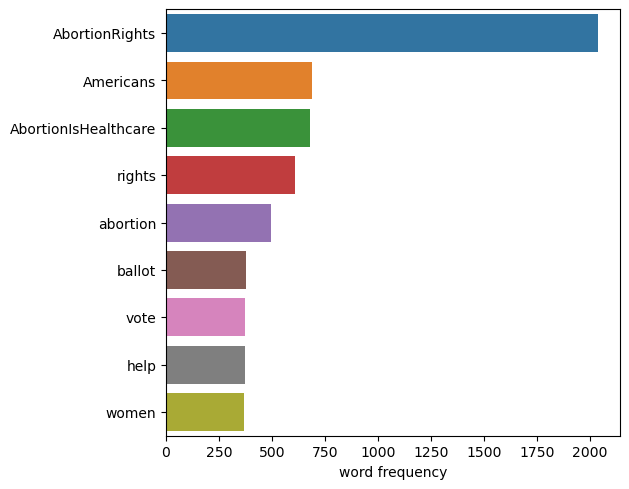

In [36]:
import matplotlib.pyplot as plt 
import seaborn as sns

counter = Counter(words)
#print(counter)
most = counter.most_common(10)
x, y= [], []

# number of most frequent word will plot
n_freq = 15

for word,count in most[:200]:
    # filtering STOPWORDS and , ' . marks
    if (word not in STOPWORDS) and len(word) > 2:
        x.append(word)
        y.append(count)
    if len(x) == n_freq:
      break
        
sns.barplot(x=y,y=x)
plt.tight_layout()
plt.xlabel('word frequency')


In [43]:
listToStr = ' '.join(map(str, words))


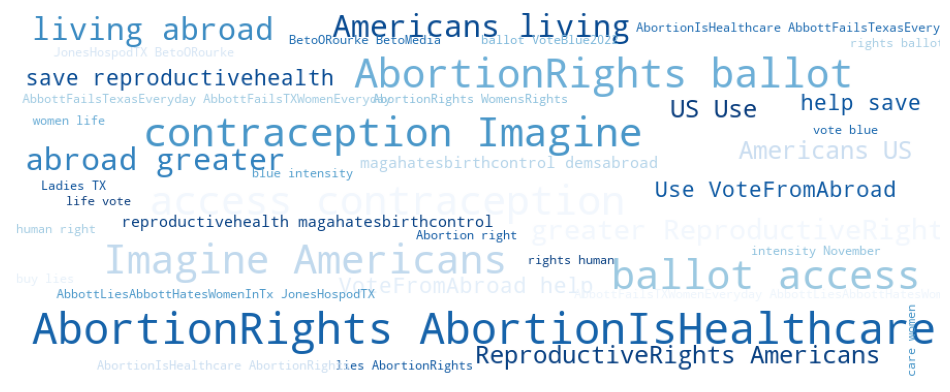

In [44]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      max_words=200,
                      max_font_size=30,
                      scale=3,
                      width = 300, height = 120,
                      random_state=1,
                      
                      colormap='Blues',

                     background_color='white')
wordcloud=wordcloud.generate(listToStr)
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### Sentiment Analysis

In [45]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 

def sentiment_scores(threshold, sentence):
    sid_obj = SentimentIntensityAnalyzer()
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= threshold :
        return 1
    elif sentiment_dict['compound'] <= - threshold :
        return -1
    else :
        return 0

In [46]:
# parameter for the cut of pos/neg/neu
threshold = 0.05

In [47]:
sentiment_class = []
for tweet in main_ar['text']:
  sentiment_class.append(sentiment_scores(threshold, tweet))

In [48]:
counter_senti = Counter(sentiment_class)
main_ar['sentiment_class'] = sentiment_class
main_ar

/var/folders/pt/ryx7csd94r120rs5zhjc4hpw0000gn/T/ipykernel_17810/936082853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_ar['sentiment_class'] = sentiment_class


,location,text,time,sentiment_class
0,NaN,Saturday’s debate got a little intense but the...,2022-10-17 22:56:07,-1
1,Calgary AB,AbortionRights are on the ballot Midterms2022....,2022-10-17 22:40:15,0
2,NaN,Saturday’s debate got a little intense but the...,2022-10-17 22:40:15,-1
3,NaN,Saturday’s debate got a little intense but the...,2022-10-17 22:39:54,-1
4,NaN,Saturday’s debate got a little intense but the...,2022-10-17 22:38:15,-1
...,...,...,...,...
3610,NaN,Join me in a giant round of middle fingers to ...,2022-10-09 06:08:27,1
3611,"Ohio, USA via NYC",ananavarro Sorry ananavarro ...You Lost Me at...,2022-10-09 06:06:33,-1
3612,Purple USA,VotingRights AbortionRights MarriageRights Equ...,2022-10-09 06:04:44,0
3615,"New York, USA",Shots from the WomensMarch on AbortionRights f...,2022-10-09 05:48:11,0


([<matplotlib.axis.XTick at 0x7fe842564130>,
 [Text(-1.0, 0, 'Negative'),
  Text(0.0, 0, 'Neutral'),
  Text(1.0, 0, 'Positive')])

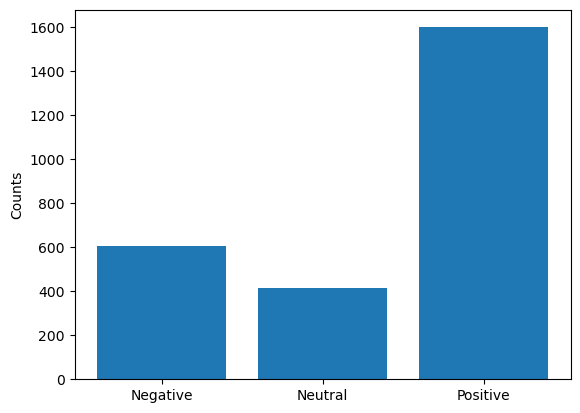

In [52]:
plt.bar(counter_senti.keys(), counter_senti.values())
plt.ylabel('Counts')
plt.xticks(np.linspace(-1, 1, 3), ['Negative', 'Neutral', 'Positive'])


### Clustering Model - K means clustering

In [53]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize


In [54]:
main_ar.head()

,location,text,time,sentiment_class
0,NaN,Saturday’s debate got a little intense but the...,2022-10-17 22:56:07,-1
1,Calgary AB,AbortionRights are on the ballot Midterms2022....,2022-10-17 22:40:15,0
2,NaN,Saturday’s debate got a little intense but the...,2022-10-17 22:40:15,-1
3,NaN,Saturday’s debate got a little intense but the...,2022-10-17 22:39:54,-1
4,NaN,Saturday’s debate got a little intense but the...,2022-10-17 22:38:15,-1


In [55]:
#selecting the feature column for clustering
cluster_df = main_ar[['sentiment_class']]

<AxesSubplot:>

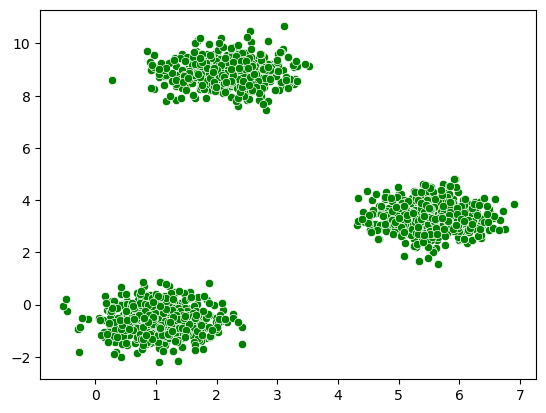

In [60]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1700, centers=3, cluster_std = 0.5)
sns.scatterplot(x=X[:,0], y=X[:,1], c =["green"])

In [61]:
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0) 

y_km = km.fit_predict(X) 

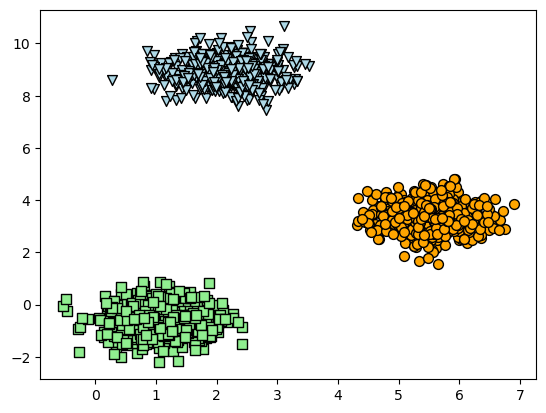

In [62]:
# plot the 3 clusters 
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1],s=50, c='lightgreen',marker='s', edgecolor='black',label='cluster 1') 
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1],s=50, c='orange',marker='o', edgecolor='black',label='cluster 2') 
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1],s=50, c='lightblue',marker='v', edgecolor='black',label='cluster 3') 



In [64]:
print(km.cluster_centers_)


[[ 1.04164694 -0.60577709]
 [ 5.5105347   3.35816478]
 [ 2.1613299   8.88097534]]


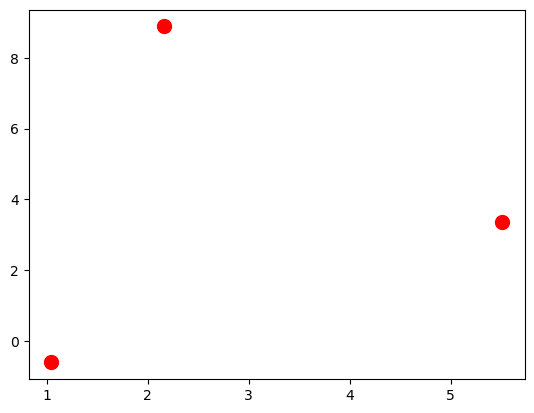

In [67]:
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100, c='red')


In [68]:
print(km.labels_)


[1 0 1 ... 0 2 1]


<AxesSubplot:>

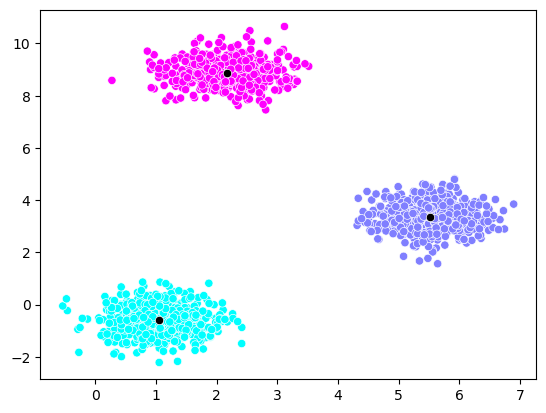

In [70]:
sns.scatterplot(x=X[:,0], y=X[:,1], c= km.labels_, cmap='cool' )

sns.scatterplot(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1], c=['black'])


In [71]:
# calculate distortion for a range of number of cluster 

distortions = [] 
for i in range(1, 11): 
       km = KMeans(n_clusters=i, init='random',n_init=10, max_iter=300,tol=1e-04, random_state=0) 
       km.fit(X) 
       distortions.append(km.inertia_) 

In [72]:
distortions

[32677.276847709392,
 10943.518868906762,
 827.16355629165,
 735.1498695726674,
 646.235930734074,
 582.2152280120181,
 491.0050428927717,
 463.4150583935885,
 412.82034885025666,
 353.08354920634247]

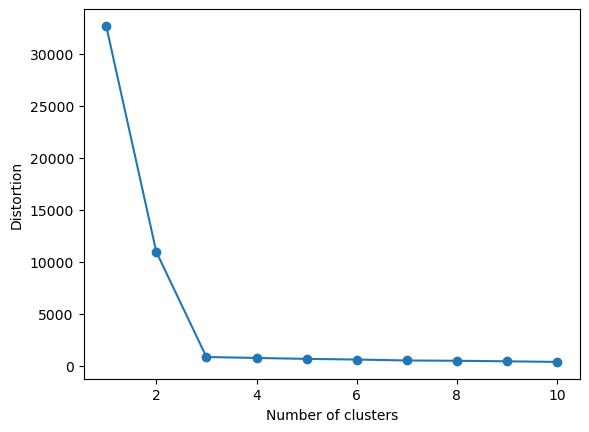

In [73]:
# plot 

plt.plot(range(1, 11), distortions, marker='o') 

plt.xlabel('Number of clusters') 

plt.ylabel('Distortion') 

plt.show() 

In [74]:
labels = km.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 302 out of 1700 samples were correctly labeled.
